,Systolic,Diastolic
count,37.000000,37.000000
mean,116.729730,80.054054
std,6.813584,3.415211
min,105.000000,71.000000
25%,113.000000,78.000000
50%,116.000000,80.000000
75%,121.000000,82.000000
max,132.000000,89.000000


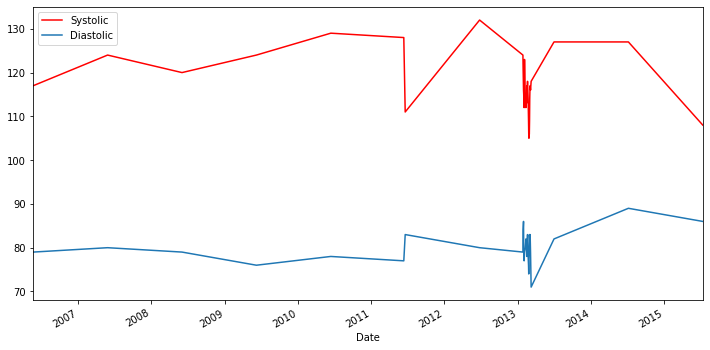

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Settings
plt.figure(figsize=(12,6), facecolor='white')

# Init
CONST_BLOOD_PRESSURE_CODE = '85354-9'
CONST_DIASTOLIC_BLOOD_PRESSURE_CODE = '8462-4'
CONST_SYSTOLIC_BLOOD_PRESSURE_CODE = '8480-6'

raw_data = []
effective_date = []
diastolic_val = []
systolic_val = []

# Get JSON data
for file in glob.glob('../data/fhir/*'):
    raw_data.append(pd.read_json(file))

# Extract info from first patient
for i in range(raw_data[0]['entry'].count()):
    resource_type = raw_data[0]['entry'][i]['resource']['resourceType']
    if resource_type == "Observation":
        code = raw_data[0]['entry'][i]['resource']['code']['coding'][0]['code']
        if code == CONST_BLOOD_PRESSURE_CODE:
            diastolic_val.append(raw_data[0]['entry'][i]['resource']['component'][0]['valueQuantity']['value'])
            systolic_val.append(raw_data[0]['entry'][i]['resource']['component'][1]['valueQuantity']['value'])
            effective_date.append(raw_data[0]['entry'][i]['resource']['effectiveDateTime'])            

# Construct DataFrame
df = pd.DataFrame({'Date' : effective_date, 'Systolic' : systolic_val, 'Diastolic' : diastolic_val})
df['Date'] = pd.to_datetime(df['Date'])

# Display
df.plot(x='Date', y='Systolic', color='red', ax=plt.gca())
df.plot(x='Date', y='Diastolic', ax=plt.gca())
df.describe()